# Traffic

William Danielson

The traffic data in this notebook will be used to try and provide a rough estimate of some of the safest neighborhoods in Pittsburgh.<br>
This will be done by analyzing the amount of vehicles going over the speed limit in specific neighborhoods.<br>
The neighborhoods with the lowest % of vehicles driving over the speed limit should have some of the safest traffic conditions,<br>
not only making driving on them safer but walking as well.

### Neccessary Files and Libraries

In [1]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
pd.set_option('display.max_rows', 100)

Lets take a look at what some of the information in this data set looks like

In [2]:
traffic = pd.read_csv("Datasets/traffic.csv")
traffic.head()

,_id,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,...,longitude,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
0,1,1011743669,85,1.445865e+09,2019-04-18,2019-04-26,4949.0,NaN,6,StatTrak,...,-79.967772,40.455733,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
1,2,1026101993,140,1.121444e+09,2019-01-24,NaN,NaN,NaN,NaN,Intersection Study,...,-79.952249,40.466157,Central Lawrenceville,7.0,9.0,42003090200,2.0,9.0,2.0,3-6
2,3,1032382575,11,1.539893e+09,2018-08-28,2018-09-04,NaN,NaN,NaN,NaN,...,-80.076469,40.460717,Windgap,2.0,28.0,42003563000,5.0,28.0,6.0,1-16
3,4,103627606,9,7.341951e+08,2018-07-17,2018-08-01,2741.0,NaN,NaN,StatTrak,...,-79.914335,40.437379,Squirrel Hill South,5.0,14.0,42003140800,3.0,14.0,4.0,2-18
4,5,1039546167,144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-80.019211,40.490794,Perry North,1.0,26.0,42003260200,1.0,26.0,1.0,1-15


As you can see, a lot of these rows contain missing information for certain fields, such as average daily traffic, or what we care about, percent over limit.<br>
Not every entry recorded data for all the columns, so this is why some of them are blank. In that case, lets filter down our list to every observation that<br>
recorded the percent of drivers over the speed limit.

In [11]:
over_limit = traffic["percent_over_limit"] > 0
traffic = traffic[over_limit]
traffic

,_id,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,...,longitude,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
0,1,1011743669,85,1.445865e+09,2019-04-18,2019-04-26,4949.0,NaN,6,StatTrak,...,-79.967772,40.455733,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
2,3,1032382575,11,1.539893e+09,2018-08-28,2018-09-04,NaN,NaN,NaN,NaN,...,-80.076469,40.460717,Windgap,2.0,28.0,42003563000,5.0,28.0,6.0,1-16
3,4,103627606,9,7.341951e+08,2018-07-17,2018-08-01,2741.0,NaN,NaN,StatTrak,...,-79.914335,40.437379,Squirrel Hill South,5.0,14.0,42003140800,3.0,14.0,4.0,2-18
5,6,1041392556,76,5.713472e+08,2019-03-22,2019-03-29,1046.0,NaN,2,StatTrak,...,-80.014234,40.458106,Central Northside,6.0,25.0,42003250300,1.0,25.0,1.0,1-21
7,8,1053645660,87,8.042089e+08,2019-04-18,2019-04-26,3015.0,NaN,4,StatTrak,...,-79.964592,40.457119,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,1366,257117947,426,1.291196e+08,2021-06-15,2021-06-23,NaN,NaN,5,StatTrak,...,-79.895583,40.453386,Homewood South,9.0,13.0,42003130300,2.0,13.0,5.0,3-17
408,1367,464876196,427,3.257468e+08,2021-06-15,2021-06-23,NaN,NaN,4,StatTrak,...,-79.894000,40.452876,Homewood South,9.0,13.0,42003130300,2.0,13.0,5.0,3-17
410,1388,1140544457,429,1.023986e+09,2021-07-09,2021-07-19,910.0,NaN,2,StatTrak,...,-79.940428,40.461034,Bloomfield,7.0,8.0,42003080600,2.0,8.0,5.0,3-23
411,1389,742131013,430,1.933385e+09,2021-07-09,2021-07-19,271.0,NaN,3,StatTrak,...,-79.953005,40.465173,Bloomfield,7.0,9.0,42003090300,2.0,9.0,5.0,3-6


Thats good, but we have a lot of columns taking up room that we don't really care about, <br>
so lets get rid of them for now just to make it easier on our eyes.

In [12]:
traffic_filtered = traffic[['percent_over_limit', 'neighborhood']]
traffic_filtered = traffic_filtered.dropna()
traffic_filtered

,percent_over_limit,neighborhood
0,77.0,Polish Hill
2,28.0,Windgap
3,70.0,Squirrel Hill South
5,2.0,Central Northside
7,58.0,Polish Hill
...,...,...
407,13.0,Homewood South
408,17.0,Homewood South
410,29.0,Bloomfield
411,10.0,Bloomfield


Much better, now we have the recorded percent over limit and the neighborhood it was recorded in.
Now we need to add up these percentages and average them over each neighborhood.
Lets start by making a new dictionary for each neighborhood, and adding all of the relevant percents to it.
After that, we can divide each percent value by the amount of times a neighborhood shows up in our data set,
giving us the average percent of people driving over the speed limit in a neighborhood

In [4]:
hood_dict = dict()
num_rows = len(traffic_filtered)

for x in range (num_rows):
    hood = traffic_filtered.iat[x, 1]

    if hood not in hood_dict:
        hood_dict[hood]= [traffic_filtered.iat[x, 0]]
    else:
        hood_dict[hood].append(traffic_filtered.iat[x, 0])
        
for key in hood_dict:
    length = len(hood_dict[key])
    runningSum = 0
    
    for num in hood_dict[key]:
        runningSum = runningSum + num
        
    hood_dict[key] = round(runningSum / length, 2)
    
hood_dict

{'Polish Hill': 45.0,
 'Windgap': 33.67,
 'Squirrel Hill South': 55.88,
 'Central Northside': 24.17,
 'Greenfield': 68.67,
 'Bluff': 14.67,
 'Crafton Heights': 98.0,
 'Highland Park': 38.71,
 'North Shore': 83.5,
 'East Liberty': 65.62,
 'Mount Washington': 75.25,
 'Brookline': 61.17,
 'Shadyside': 44.07,
 'Squirrel Hill North': 48.57,
 'Bloomfield': 24.56,
 'Larimer': 48.78,
 'Friendship': 68.0,
 'Point Breeze': 64.5,
 'Regent Square': 86.0,
 'Central Lawrenceville': 18.5,
 'Knoxville': 25.0,
 'Central Oakland': 25.67,
 'Strip District': 60.33,
 'Beechview': 59.0,
 'Upper Hill': 24.33,
 'Stanton Heights': 81.33,
 'Manchester': 40.11,
 'South Side Slopes': 59.43,
 'Morningside': 42.12,
 'Perry North': 57.43,
 'North Oakland': 58.5,
 'East Hills': 62.0,
 'Duquesne Heights': 48.0,
 'Sheraden': 61.0,
 'Central Business District': 6.0,
 'St. Clair': 85.0,
 'Perry South': 25.67,
 'Carrick': 45.5,
 'Westwood': 59.5,
 'Allegheny Center': 65.0,
 'Elliott': 97.0,
 'East Allegheny': 38.0,
 'Over

Great, lets put this dictionary into its own dataframe.

In [5]:
hoods_averaged = traffic_filtered.drop_duplicates('neighborhood')
num_rows = len(hoods_averaged)

for x in range (num_rows):
    hoods_averaged.iat[x, 0] = hood_dict[hoods_averaged.iat[x, 1]]
    
hoods_averaged = hoods_averaged.rename(columns={'percent_over_limit':'% Over speed limit'})
columns_titles = ["neighborhood","% Over speed limit"]
hoods_averaged = hoods_averaged.reindex(columns=columns_titles)
hoods_averaged

,neighborhood,% Over speed limit
0,Polish Hill,45.00
2,Windgap,33.67
3,Squirrel Hill South,55.88
5,Central Northside,24.17
11,Greenfield,68.67
13,Bluff,14.67
14,Crafton Heights,98.00
17,Highland Park,38.71
18,North Shore,83.50
19,East Liberty,65.62


Lets put this dataset on a map of Pittsburgh now to better visualize it.

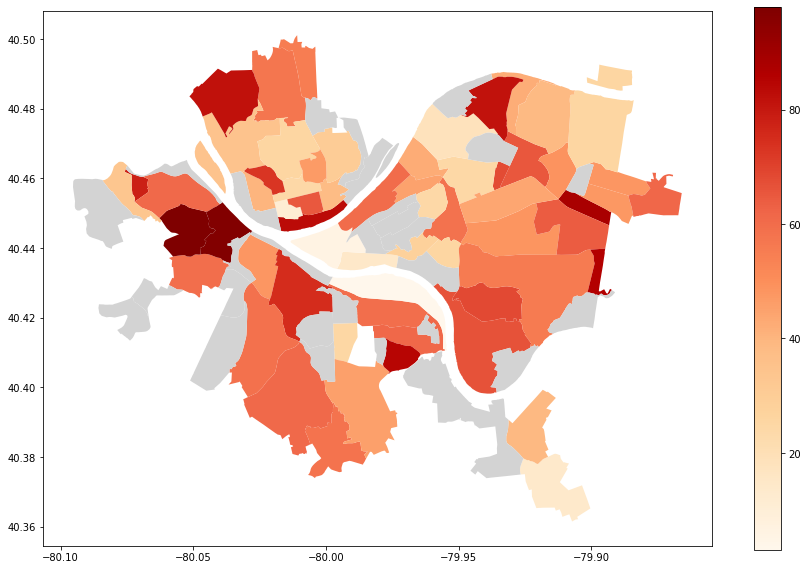

In [6]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") 
traffic_map = neighborhoods.merge(hoods_averaged, how='left', left_on='hood', right_on='neighborhood')
traffic_map.plot(column='% Over speed limit', legend=True, figsize=(15,10), cmap='OrRd', missing_kwds={'color': 'lightgrey'})

The gray neighborhoods had no traffic data available

Lets put these neighborhoods in a bar graph so we can compare them side by side.

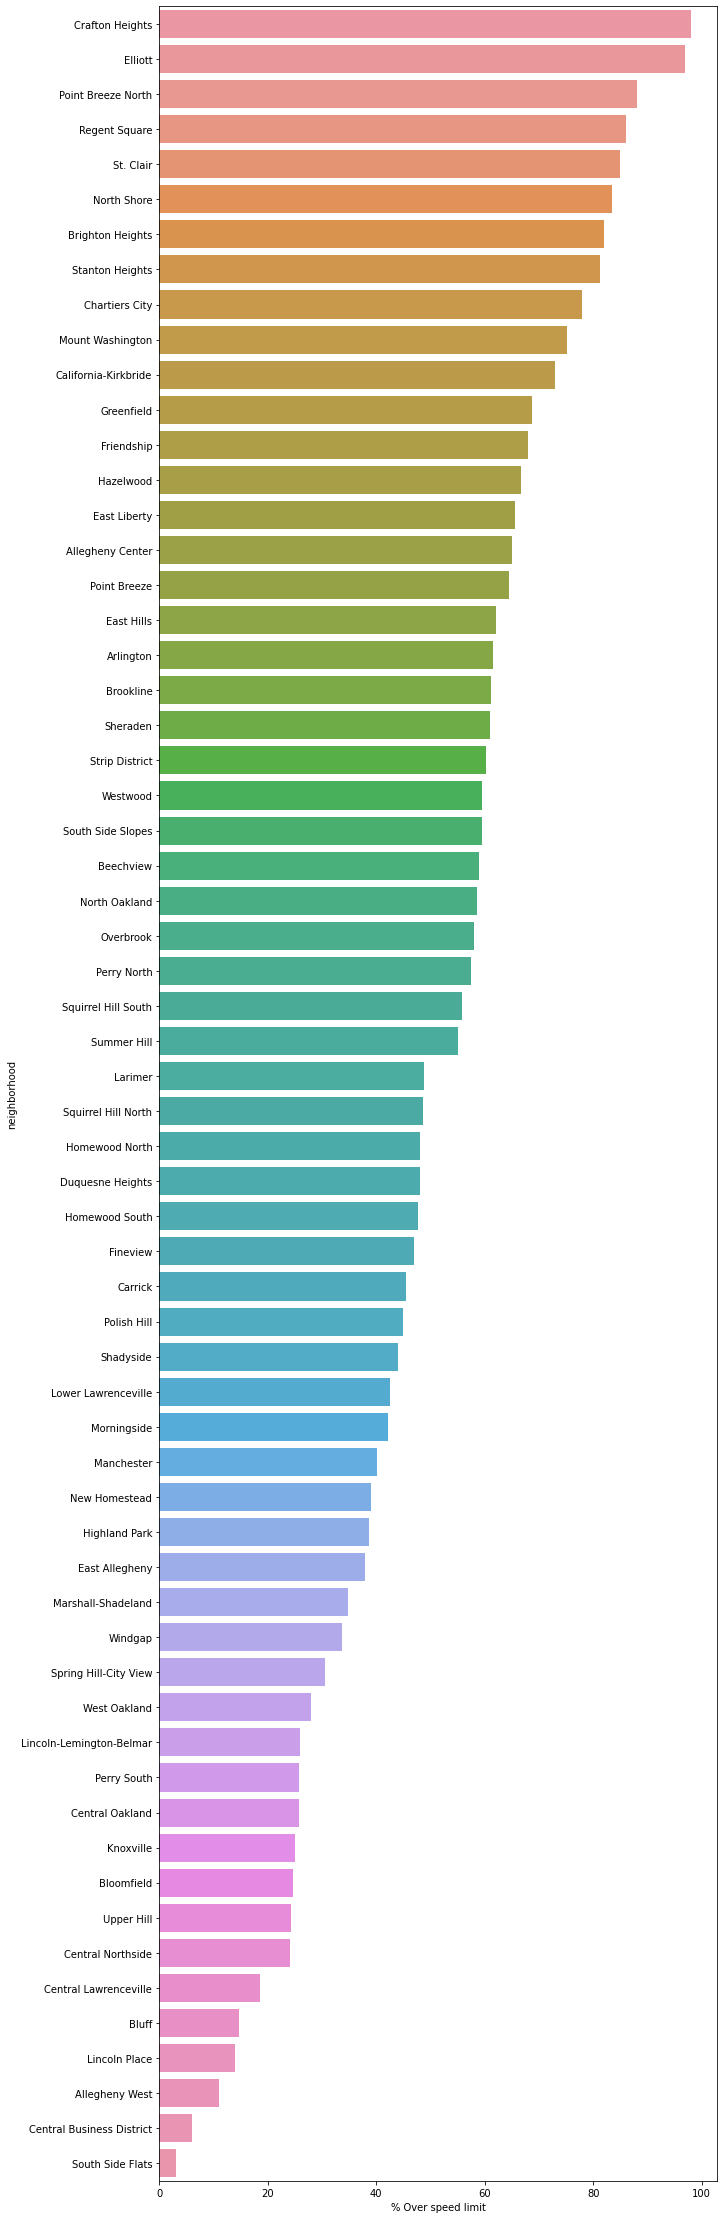

In [7]:
fig_dims = (10, 40)
fig, ax = plt.subplots(figsize=fig_dims)

ax = sb.barplot(x="% Over speed limit", # x axis label
                 y="neighborhood", # y axis label
                 ax=ax, # figsizes
                 data=hoods_averaged, # data we want to show
                 orient="h", # orientation of the graph
                 order=hoods_averaged.sort_values("% Over speed limit", ascending = False).neighborhood)

We now have a much better look at what our neighborhoods look like stacked up against one-another.<br>
We can see now that our top 10 safest neighborhoods are the following:

In [10]:
hoods_averaged = hoods_averaged.sort_values('% Over speed limit', ascending=False)
hoods_averaged.tail(10)

,neighborhood,% Over speed limit
45,Knoxville,25.00
30,Bloomfield,24.56
61,Upper Hill,24.33
5,Central Northside,24.17
43,Central Lawrenceville,18.50
13,Bluff,14.67
318,Lincoln Place,14.00
205,Allegheny West,11.00
114,Central Business District,6.00
310,South Side Flats,3.00


### Conclusion
Based on the data provided by Pittsburgh's Department of Mobility & Infrastructure, the neighborhoods <br>
with (on average) the least amount of speeding vehicles are: <br>
- South Side Flats (1)
- Central Business District (2)
- Allegheny West (3)
- Lincoln Place (4)
- Bluff (5)
- Central Lawrenceville (6)
- Central Northside (7)
- Upper Hill (8)
- Bloomfield (9)
- Knoxville (10)

#### Important considerations
The data used in this analysis was collected between the years of 2017 and 2021.<br>
Its also important to note that only around 60 out of rougly 90 different neighborhoods had <br>
any traffic data recorded about them. The reason for this is unknown, so its important <br>
to note that this neighborhood list is not comprehensive for every single neighborhood in the city of Pittsburgh